In [1]:
#NLP project/analysis feb2015 feelings on twitter

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
tweet_df= pd.read_csv(r"C:\Users\range\Downloads\archive (11)\Tweets.csv")

tweet_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
tweet_df.columns


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [8]:
tweet_df = tweet_df.loc[:,['airline_sentiment', 'airline', 'text']]

In [9]:
tweet_df.head()


,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [10]:
tweet_df.shape


(14640, 3)

In [11]:
tweet_df['airline_sentiment'].value_counts()


airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

<Axes: xlabel='airline_sentiment', ylabel='count'>

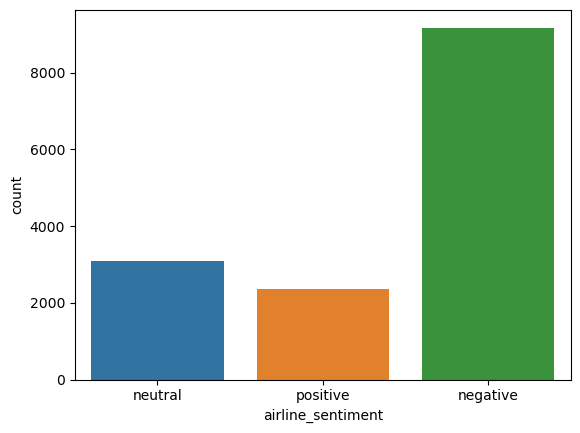

In [12]:
sns.countplot(x='airline_sentiment', data=tweet_df)


In [13]:
tweet_df['airline'].value_counts()


airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: xlabel='airline', ylabel='count'>

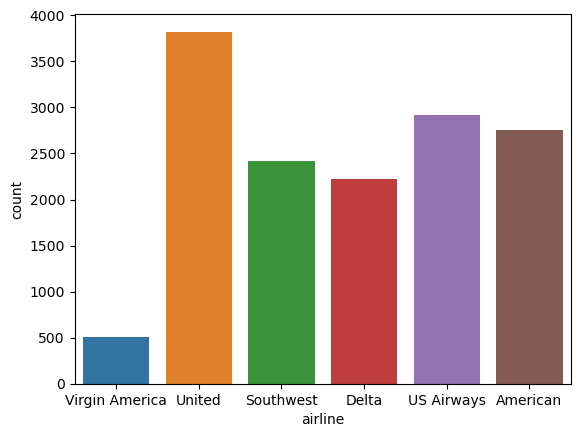

In [14]:
sns.countplot(x='airline', data=tweet_df)


<Axes: xlabel='airline_sentiment', ylabel='count'>

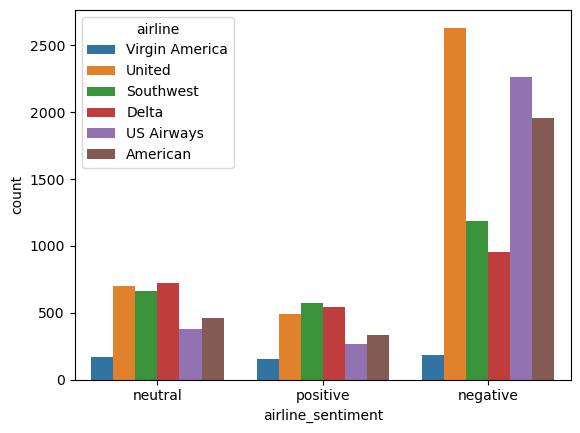

In [15]:
sns.countplot(x='airline_sentiment', hue='airline', data=tweet_df)


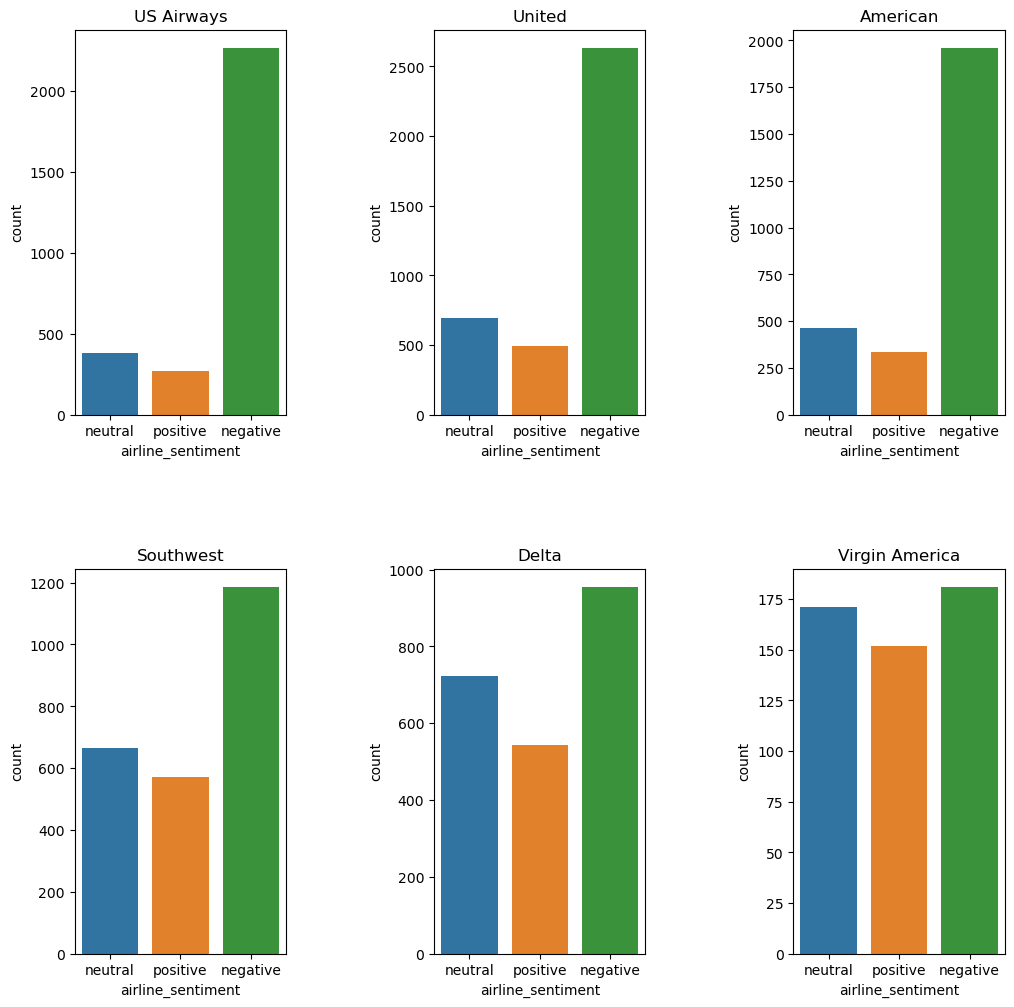

In [16]:
def plot_sub_sentiment(Airline):
    df = tweet_df.loc[tweet_df['airline']==Airline, :]
    sns.countplot(x='airline_sentiment', order=['neutral', 'positive', 'negative'], data=df)
    plt.title(Airline)

plt.figure(1,figsize=(12, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.7)

plt.subplot(2, 3, 1)
plot_sub_sentiment('US Airways')

plt.subplot(2, 3, 2)
plot_sub_sentiment('United')

plt.subplot(2, 3, 3)
plot_sub_sentiment('American')

plt.subplot(2, 3, 4)
plot_sub_sentiment('Southwest')

plt.subplot(2, 3, 5)
plot_sub_sentiment('Delta')

plt.subplot(2, 3, 6)
plot_sub_sentiment('Virgin America')

In [19]:
from wordcloud import WordCloud, STOPWORDS


In [18]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/151.4 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 1.5 MB/s eta 0:00:00


In [20]:
from wordcloud import WordCloud, STOPWORDS


In [21]:
df = tweet_df.loc[tweet_df['airline_sentiment']=='negative', :]

df.head()

,airline_sentiment,airline,text
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a fligh...
15,negative,Virgin America,@VirginAmerica SFO-PDX schedule is still MIA.
17,negative,Virgin America,@VirginAmerica I flew from NYC to SFO last we...


In [23]:
words = ' '.join(df['text'])

print(words[:1000])

@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse @VirginAmerica and it's a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat an

In [24]:
df = tweet_df.loc[tweet_df['airline_sentiment']=='negative', :]

words = ' '.join(df['text'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [26]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

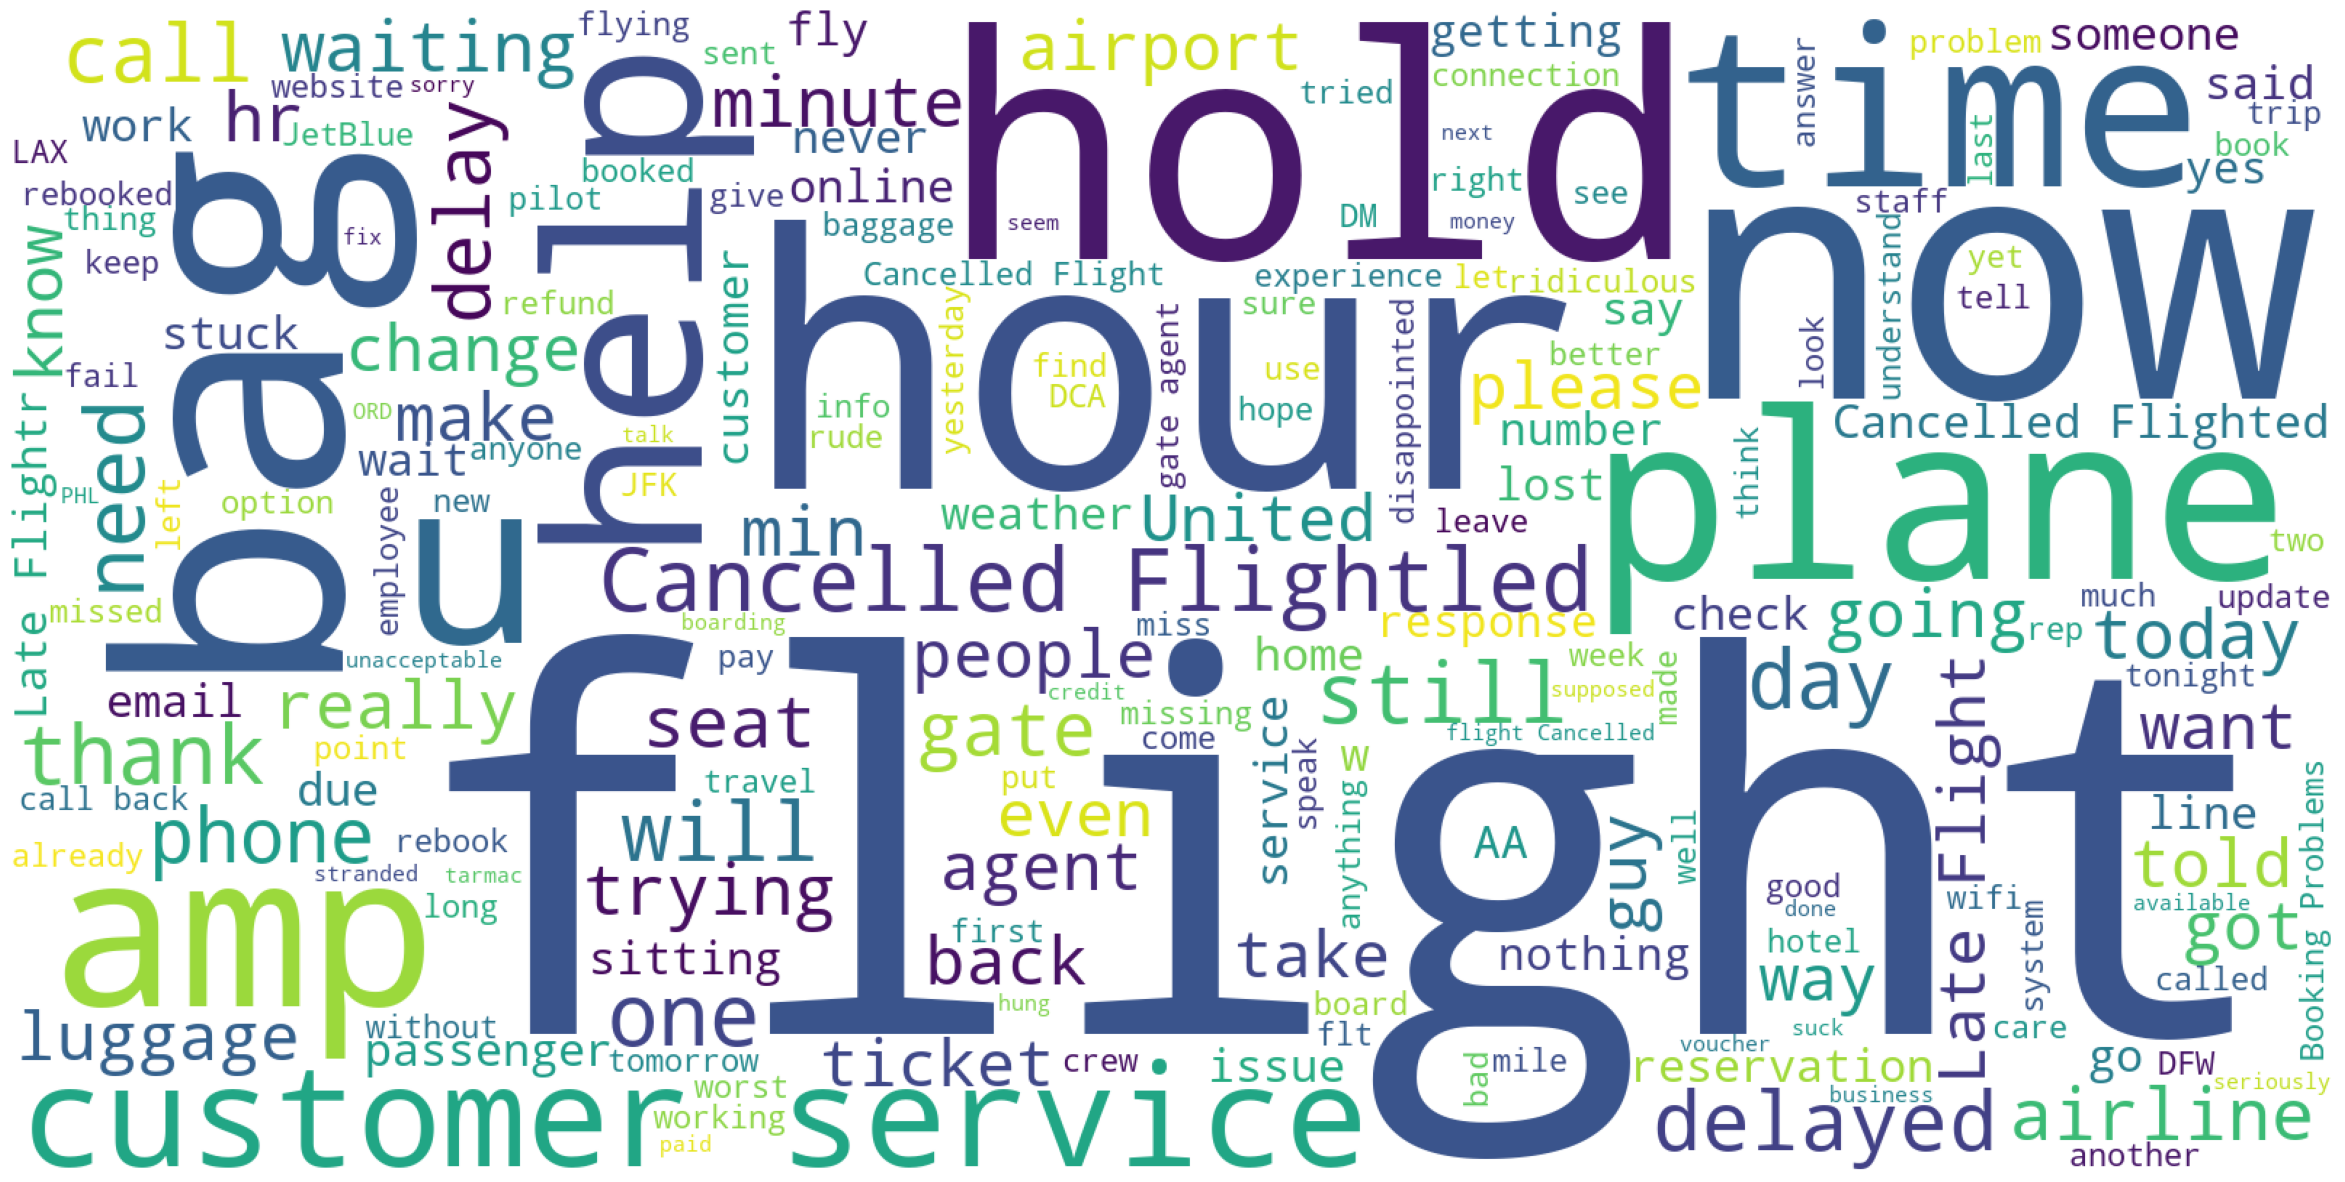

In [27]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
!pip install nltk

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\range\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [31]:
stemmer = PorterStemmer()


In [32]:
lemmatizer = WordNetLemmatizer()


In [33]:
clean_tweet_lst = []

tweet_len_lst = []

In [34]:
def preprocess(raw_tweet, flag):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    letters_only = letters_only.lower()
    words = letters_only.split()
    words = [w for w in words if not w in stopwords.words("english")]
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_tweet_lst.append(" ".join(words))
    
    tweet_len_lst.append(len(words))

In [35]:
!pip install tqdm

In [36]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [37]:
clean_tweet_lst = []

tweet_len_lst = []

tweet_df['text'].progress_apply(lambda x: preprocess(x, 'stem'))

tweet_df['clean_tweet_stem'] = clean_tweet_lst

tweet_df['tweet_length_stem'] = tweet_len_lst

100%|███████████████████████████████████████████████████████████████████████████| 14640/14640 [00:39<00:00, 366.72it/s]


In [38]:
tweet_df.head()


,airline_sentiment,airline,text,clean_tweet_stem,tweet_length_stem
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,3
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,6
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anoth ...,8
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,11
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,virginamerica realli big bad thing,5


In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\range\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
clean_tweet_lst = []
tweet_len_lst = []
tweet_df['text'].progress_apply(lambda x: preprocess(x, 'lemma'))
tweet_df['clean_tweet_lema'] = clean_tweet_lst
tweet_df['tweet_length_lema'] = tweet_len_lst

100%|███████████████████████████████████████████████████████████████████████████| 14640/14640 [00:40<00:00, 362.39it/s]


In [41]:
tweet_df.head()


,airline_sentiment,airline,text,clean_tweet_stem,tweet_length_stem,clean_tweet_lema,tweet_length_lema
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,3,virginamerica dhepburn said,3
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,6,virginamerica plus added commercial experience...,6
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anoth ...,8,virginamerica today must mean need take anothe...,8
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,11,virginamerica really aggressive blast obnoxiou...,11
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,virginamerica realli big bad thing,5,virginamerica really big bad thing,5


In [42]:
tweet_df['sentiment']=tweet_df['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
tweet_df.head()

,airline_sentiment,airline,text,clean_tweet_stem,tweet_length_stem,clean_tweet_lema,tweet_length_lema,sentiment
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,3,virginamerica dhepburn said,3,1
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,6,virginamerica plus added commercial experience...,6,1
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anoth ...,8,virginamerica today must mean need take anothe...,8,1
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,11,virginamerica really aggressive blast obnoxiou...,11,0
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,virginamerica realli big bad thing,5,virginamerica really big bad thing,5,0


In [43]:
tweet_df['sentiment'].value_counts()


sentiment
0    9178
1    5462
Name: count, dtype: int64

In [44]:
from sklearn.model_selection  import train_test_split
train, test = train_test_split(tweet_df,test_size=0.2,random_state=35)

In [45]:
train_clean_tweet=[]
for tweet in train['clean_tweet_stem']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet_stem']:
    test_clean_tweet.append(tweet)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
train_features = vectorizer.fit_transform(train_clean_tweet)
test_features = vectorizer.transform(test_clean_tweet)

In [47]:
vectorizer.vocabulary_


{'southwestair': 59815,
 'look': 39342,
 'like': 38363,
 'yr': 76449,
 'anni': 4117,
 'trip': 67403,
 'replac': 53682,
 'someon': 59337,
 'itinerari': 34611,
 'worri': 75115,
 'abt': 352,
 'flight': 24063,
 'http': 32714,
 'co': 12513,
 'bape': 7155,
 'rumn': 55321,
 'southwestair look': 60186,
 'look like': 39405,
 'like yr': 38616,
 'yr anni': 76452,
 'anni trip': 4118,
 'trip replac': 67490,
 'replac someon': 53693,
 'someon itinerari': 59395,
 'itinerari worri': 34632,
 'worri abt': 75116,
 'abt flight': 355,
 'flight http': 24471,
 'http co': 32715,
 'co bape': 12555,
 'bape rumn': 7156,
 'thank': 64160,
 'heartlanta': 30607,
 'thank southwestair': 64467,
 'southwestair heartlanta': 60098,
 'unit': 68739,
 'understand': 68558,
 'pilot': 49193,
 'would': 75305,
 'get': 27402,
 'plane': 49499,
 'st': 60905,
 'class': 12043,
 'empti': 20524,
 'coach': 13428,
 'seat': 56398,
 'near': 43972,
 'premier': 50861,
 'unit understand': 69735,
 'understand pilot': 68602,
 'pilot would': 49279

In [48]:
print("Total unique words:", len(vectorizer.vocabulary_))
print("Type of train_features:", type(train_features))
print("Shape of input data", train_features.shape)

Total unique words: 76705
Type of train_features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data (11712, 76705)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [50]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)
]

In [51]:
for classifier in Classifiers:
    model = classifier.fit(train_features,train['sentiment'])
    pred = model.predict(test_features)
    accuracy = accuracy_score(pred,test['sentiment'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))    

Accuracy of LogisticRegression is 0.8254781420765027
Accuracy of DecisionTreeClassifier is 0.7619535519125683
Accuracy of RandomForestClassifier is 0.8148907103825137


In [52]:
model = LogisticRegression()

model.fit(train_features,train['sentiment'])

LogisticRegression()

In [66]:
import pickle

In [67]:
with open('mypickle.pickle', 'wb') as f:
    pickle.dump(vectorizer, f)

In [68]:
with open('mipickle.pickle', 'wb') as f:
    pickle.dump(model, f)

In [74]:
from pickle import load
import pickle as pk1

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [76]:
def preprocess(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    letters_only = letters_only.lower()
    words = letters_only.split()
    words = [w for w in words if not w in stopwords.words("english")]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    clean_sent = " ".join(words)
    return clean_sent

In [77]:
def predict(tweet):
    vectorizer = load(open('mypickle.pickle', 'rb'))
    classifier = load(open('mipickle.pickle', 'rb'))
    clean_tweet = preprocess(tweet)
    clean_tweet_encoded = vectorizer.transform([clean_tweet])
    prediction = classifier.predict(clean_tweet_encoded)
    return prediction

In [85]:
tweet = input("Enter a tweet to check its sentiment: ")

prediction = predict(tweet)

print(prediction)

Enter a tweet to check its sentiment: very good experience
[1]


In [86]:
if(prediction == 0):
    print("Negative Sentiment")
else:
    print("Positive Sentiment")

Positive Sentiment
